# High low service testing

Do not forget to `python -m pip install -e .`

In [1]:
import pandas as pd
from tomodachi_core.tomodachi.services.high_low_profit_service import HighLowProfit
from pprint import pprint

# I have to create mock df for testing
data = [
    {'symbol': 'AAPL', 'price': 150, 'high': 155, 'low': 145, 'profit': 5, "datetime": '2023-10-01 10:00:00'},
    {'symbol': 'GOOGL', 'price': 2800, 'high': 2900, 'low': 2700, 'profit': 100, "datetime": '2023-06-01 10:00:00'},
    {'symbol': 'AMZN', 'price': 3400, 'high': 3500, 'low': 3300, 'profit': 100, "datetime": '2023-07-01 10:00:00'},
    {'symbol': 'MSFT', 'price': 300, 'high': 310, 'low': 290, 'profit': 10, "datetime": '2023-08-01 10:00:00'},
    {'symbol': 'TSLA', 'price': 700, 'high': 750, 'low': 650, 'profit': 50, "datetime": '2023-09-01 10:00:00'},
    {'symbol': 'NFLX', 'price': 600, 'high': 620, 'low': 580, 'profit': 20, "datetime": '2023-10-01 10:00:00'},
    {'symbol': 'FB', 'price': 350, 'high': 360, 'low': 340, 'profit': 10, "datetime": '2023-2-27 10:00:00'},
    {'symbol': 'NVDA', 'price': 200, 'high': 210, 'low': 190, 'profit': 10, "datetime": '2023-1-31 10:00:00'},
    {'symbol': 'DIS', 'price': 180, 'high': 190, 'low': 170, 'profit': 10, "datetime": '2023-10-01 10:00:00'},
    {'symbol': 'V', 'price': 220, 'high': 230, 'low': 210, 'profit': 10, "datetime": '2023-08-03 10:00:00'},
    {'symbol': 'PYPL', 'price': 250, 'high': 260, 'low': 240, 'profit': 10, "datetime": '2023-05-24 10:00:00'},
]

# create the dataframe
df = pd.DataFrame(data)

# convert the datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# instantiate the service
high_low_profit = HighLowProfit(df)

# get the high low profit
high_low_profit.calculate_statistics(columns='profit')

# print the results
print(high_low_profit._df.head(), end="\n\n")

# print the computed statistics in a more organized way
output = {
    "Mean Output": high_low_profit.mean_output,
    "Standard Deviation Output": high_low_profit.std_output,
    "Low Threshold": high_low_profit.low_threshold,
    "High Threshold": high_low_profit.high_threshold
}

pprint(output, indent=4)

  symbol  price  high   low  profit            datetime
0   AAPL    150   155   145       5 2023-10-01 10:00:00
1  GOOGL   2800  2900  2700     100 2023-06-01 10:00:00
2   AMZN   3400  3500  3300     100 2023-07-01 10:00:00
3   MSFT    300   310   290      10 2023-08-01 10:00:00
4   TSLA    700   750   650      50 2023-09-01 10:00:00

{   'High Threshold': np.float64(66.95485678572079),
    'Low Threshold': np.float64(-6.045765876629886),
    'Mean Output': np.float64(30.454545454545453),
    'Standard Deviation Output': np.float64(36.50031133117534)}


### Print the information (new method! )

In [2]:
high_low_profit.print_info()


        Mean Output: 30.454545454545453

        Std Output: 36.50031133117534

        High Threshold: 66.95485678572079

        Low Threshold: -6.045765876629886



Let us now check what the `classify_data` method does:

In [3]:
high_low_profit.classify_data(columns='profit')
print(high_low_profit._df.head(), end="\n\n")

  symbol  price  high   low  profit            datetime  Status
0   AAPL    150   155   145       5 2023-10-01 10:00:00  Normal
1  GOOGL   2800  2900  2700     100 2023-06-01 10:00:00    High
2   AMZN   3400  3500  3300     100 2023-07-01 10:00:00    High
3   MSFT    300   310   290      10 2023-08-01 10:00:00  Normal
4   TSLA    700   750   650      50 2023-09-01 10:00:00  Normal



### Finding the periods?

The suggested code (vectorized) is much better than the original (Alex) version using `for row in df.iterrows()` for the following reasons:

1. **Performance**: Iterating over rows with `iterrows()` is significantly slower, especially for large DataFrames, as it processes rows one by one in Python. The suggested approach leverages vectorized operations in pandas, which are implemented in C and optimized for performance.

2. **Readability**: The suggested code is more concise and easier to read. It avoids the boilerplate of manually iterating through rows and maintaining state, making the logic clearer and more maintainable.

3. **Scalability**: The vectorized approach scales better with larger datasets. As the size of the DataFrame grows, the performance difference between `iterrows()` and vectorized operations becomes more pronounced.

4. **Avoiding Common Pitfalls**: Using `iterrows()` can lead to subtle bugs, as it returns a copy of the row rather than a reference to the original data. This can cause unexpected behavior when modifying data. The suggested approach avoids this issue entirely.

5. **Pandas Best Practices**: The pandas library is designed to work efficiently with vectorized operations. Using `iterrows()` is generally discouraged unless absolutely necessary, as it goes against the design philosophy of pandas.

#### Sum-up 

the suggested code is faster, cleaner, and more in line with pandas best practices, making it a superior choice for this task.

In [4]:
# Let us run the original version
high_low_profit.find_periods() # does not require column (but in future? Maybe)
print(high_low_profit._df.head(), end="\n\n")

# Notice: we save periods to the class, so we can access them later
# We have to create a method for that
# For now, let us manually access the periods
print("High Periods: ", high_low_profit.high_periods, end="\n\n")
print("Low Periods: ", high_low_profit.low_periods, end="\n\n")

  symbol  price  high   low  profit            datetime  Status
0   AAPL    150   155   145       5 2023-10-01 10:00:00  Normal
1  GOOGL   2800  2900  2700     100 2023-06-01 10:00:00    High
2   AMZN   3400  3500  3300     100 2023-07-01 10:00:00    High
3   MSFT    300   310   290      10 2023-08-01 10:00:00  Normal
4   TSLA    700   750   650      50 2023-09-01 10:00:00  Normal

High Periods:  [(np.int64(1), np.int64(3))]

Low Periods:  []



In [5]:
# Find periods
high_low_profit.find_periods()
print(high_low_profit._df.head(), end="\n\n")

# Display the periods
high_low_profit.print_periods()

  symbol  price  high   low  profit            datetime  Status
0   AAPL    150   155   145       5 2023-10-01 10:00:00  Normal
1  GOOGL   2800  2900  2700     100 2023-06-01 10:00:00    High
2   AMZN   3400  3500  3300     100 2023-07-01 10:00:00    High
3   MSFT    300   310   290      10 2023-08-01 10:00:00  Normal
4   TSLA    700   750   650      50 2023-09-01 10:00:00  Normal


        High Periods: [(np.int64(1), np.int64(3))]

        Low Periods: []



In [6]:
periods_df = high_low_profit.create_periods_dataframe(['profit', 'price'])
print(periods_df.head(), end="\n\n")

  Period Type  Start Time  End Time  Duration Hours  Avg_profit  Max_profit  \
0        High           1         3               3        70.0         100   

   Min_profit    Avg_price  Max_price  Min_price  
0          10  2166.666667       3400        300  



In [7]:
# try entry point
data_with_results = high_low_profit.run_analysis('profit')

# print the data 
print(data_with_results['periods_df'].head(), end="\n\n")

  symbol  price  high   low  profit            datetime  Status
0   AAPL    150   155   145       5 2023-10-01 10:00:00  Normal
1  GOOGL   2800  2900  2700     100 2023-06-01 10:00:00    High
2   AMZN   3400  3500  3300     100 2023-07-01 10:00:00    High
3   MSFT    300   310   290      10 2023-08-01 10:00:00  Normal
4   TSLA    700   750   650      50 2023-09-01 10:00:00  Normal



In [8]:
pprint(data_with_results)

{'high_periods': [(np.int64(1), np.int64(3))],
 'high_threshold': np.float64(66.95485678572079),
 'low_periods': [],
 'low_threshold': np.float64(-6.045765876629886),
 'mean_output': np.float64(30.454545454545453),
 'periods_df':    symbol  price  high   low  profit            datetime  Status
0    AAPL    150   155   145       5 2023-10-01 10:00:00  Normal
1   GOOGL   2800  2900  2700     100 2023-06-01 10:00:00    High
2    AMZN   3400  3500  3300     100 2023-07-01 10:00:00    High
3    MSFT    300   310   290      10 2023-08-01 10:00:00  Normal
4    TSLA    700   750   650      50 2023-09-01 10:00:00  Normal
5    NFLX    600   620   580      20 2023-10-01 10:00:00  Normal
6      FB    350   360   340      10 2023-02-27 10:00:00  Normal
7    NVDA    200   210   190      10 2023-01-31 10:00:00  Normal
8     DIS    180   190   170      10 2023-10-01 10:00:00  Normal
9       V    220   230   210      10 2023-08-03 10:00:00  Normal
10   PYPL    250   260   240      10 2023-05-24 10:00:0

<Axes: xlabel='datetime', ylabel='profit'>

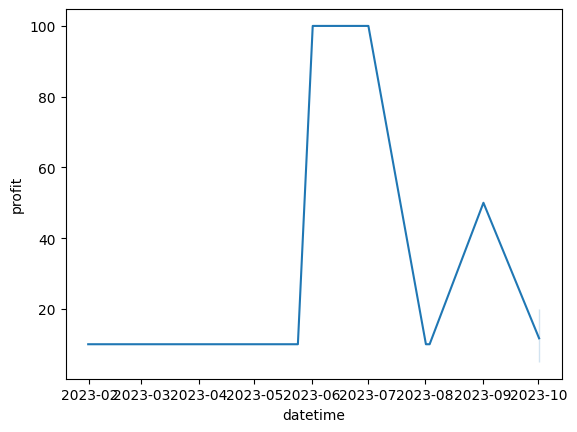

In [13]:
# visualize using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=data_with_results['periods_df'][['datetime', 'profit']], x="datetime", y="profit")

<Axes: xlabel='datetime', ylabel='profit'>

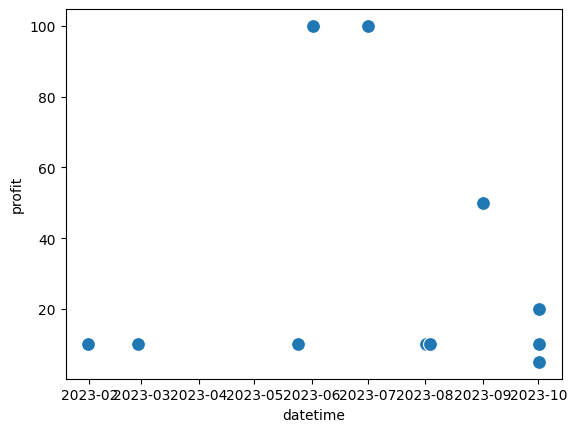

In [18]:
sns.scatterplot(data=data_with_results['periods_df'][['datetime', 'profit']], x="datetime", y="profit", markers=["o", "X"], s=100)

<Axes: xlabel='profit', ylabel='Count'>

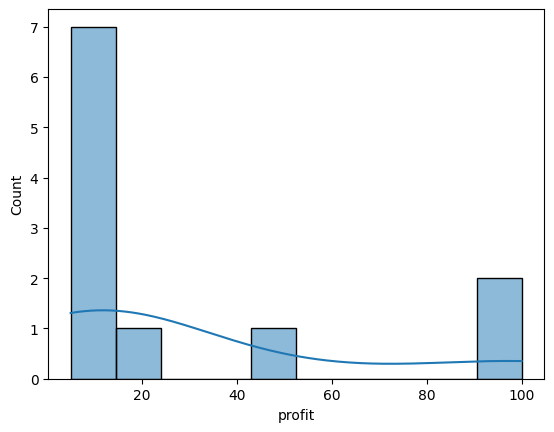

In [19]:
sns.histplot(data_with_results['periods_df']["profit"], bins=10, kde=True)

<Axes: xlabel='symbol', ylabel='profit'>

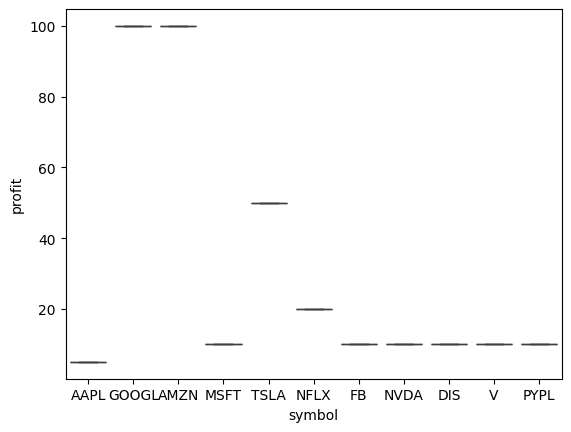

In [20]:
sns.boxplot(data_with_results['periods_df'], x="symbol", y="profit")


In [21]:
import plotly.express as px
fig = px.scatter(data_with_results['periods_df'][['datetime', 'profit', 'Status']], x="datetime", y="profit", color="Status", symbol="Status")
fig.show()


<Axes: >

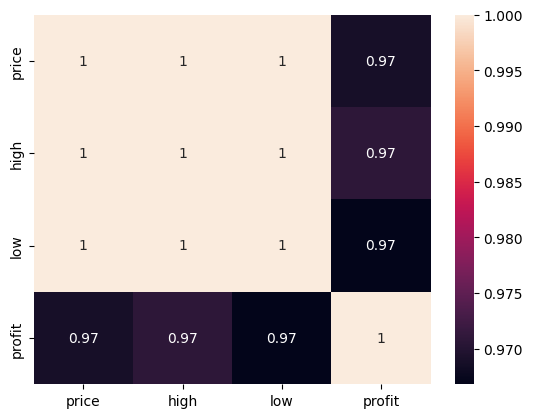

In [22]:
sns.heatmap(data_with_results['periods_df'][['price', 'high', 'low', 'profit']].corr(), annot=True)


<Axes: xlabel='Status', ylabel='profit'>

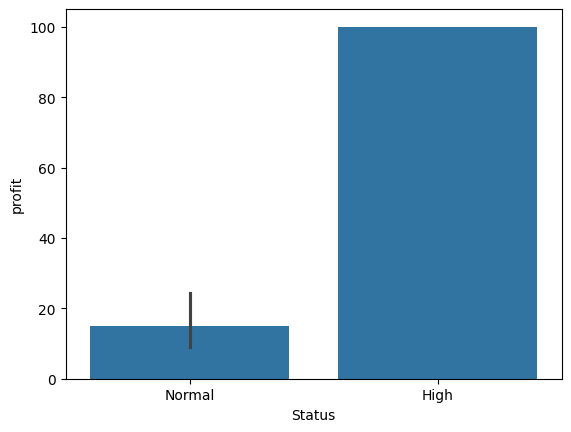

In [23]:
sns.barplot(data=data_with_results['periods_df'], x="Status", y="profit")
